In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
articles = pd.read_csv("data//articles.csv")
customers = pd.read_csv("data//customers.csv")
transactions = pd.read_csv("data//transactions_train.csv")

## Article

| column                                                                                                        | description                                                          |
|---------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|
| article_id                                                                                                    | A unique identifier of every article                             |
| product_code prod_name                                                                                        | A unique identifier of every product and its name (not the same) |
| product_type product_type_name                                                                                | The group of product_code and its name                           |
| product_group_name                                                                                            | The group of product group's name                                |
| graphical_appearance_no graphical_appearance_name                                                             | The group of graphics and its name                               |
| colour_group_code colour_group_name                                                                           | The group of color and its name                                  |
| perceived_colour_value_id perceived_colour_value_name perceived_colour_master_id perceived_colour_master_name | The * added color info                                           |
| department_no department_name                                                                                 | A unique identifier of every dep and its name                    |
| index_code index_name                                                                                         | A unique identifier of every index and its name                  |
| index_group_no index_group_name                                                                               | A group of indeces and its name                                  |
| section_no section_name                                                                                       | A unique identifier of every section and its name                |
| garment_group_no garment_group_name                                                                           | A unique identifier of every garment and its name                |
| detail_desc                                                                                                   | Details                                                          |

### 紳士服・婦人服区分毎の商品数

In [6]:
df_index = pd.DataFrame(articles[['article_id', 'index_group_name', 'index_name']].sort_values('index_group_name').groupby(['index_group_name', 'index_name']).count()['article_id'])
df_index

article_id
index_group_name index_name                                
Baby/Children    Baby Sizes 50-98                      8875
                 Children Accessories, Swimwear        4615
                 Children Sizes 134-170                9214
                 Children Sizes 92-140                12007
Divided          Divided                              15149
Ladieswear       Ladies Accessories                    6961
                 Ladieswear                           26001
                 Lingeries/Tights                      6775
Menswear         Menswear                             12553
Sport            Sport                                 3392

In [7]:
%matplotlib inline

<AxesSubplot:ylabel='index_group_name,index_name'>

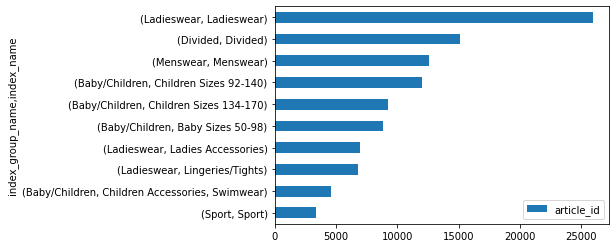

In [8]:
df_index.sort_values('article_id').plot.barh()

### グループ毎・タイプ毎の商品数

In [9]:
df_group = pd.DataFrame(articles.groupby(['product_group_name', 'product_type_name']).count()['article_id'])
df_group

article_id
product_group_name  product_type_name            
Accessories         Accessories set             7
                    Alice band                  6
                    Baby Bib                    3
                    Bag                      1280
                    Beanie                     56
...                                           ...
Underwear           Underwear corset            7
                    Underwear set              47
Underwear/nightwear Sleep Bag                   6
                    Sleeping sack              48
Unknown             Unknown                   121

[132 rows x 1 columns]

In [10]:
# 上位10件
df_group.sort_values('article_id', ascending=False).head(10)

article_id
product_group_name product_type_name            
Garment Lower body Trousers                11169
Garment Full body  Dress                   10362
Garment Upper body Sweater                  9302
                   T-shirt                  7904
                   Top                      4155
                   Blouse                   3979
                   Jacket                   3940
Garment Lower body Shorts                   3939
Garment Upper body Shirt                    3405
                   Vest top                 2991

<AxesSubplot:ylabel='product_group_name,product_type_name'>

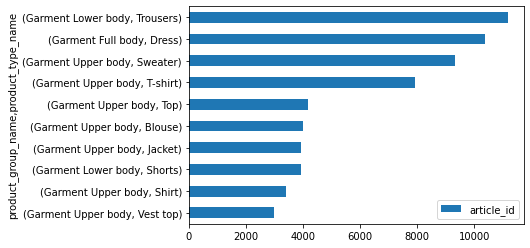

In [11]:
df_group.sort_values('article_id').tail(10).plot.barh()

### 色

In [12]:
df_colour = pd.DataFrame(articles[['article_id', 'colour_group_name']].groupby(['colour_group_name']).count()['article_id'])
df_colour.sort_values('article_id', ascending=False)

,article_id
colour_group_name,
Black,22670
Dark Blue,12171
White,9542
Light Pink,5811
Grey,4487
Light Beige,3356
Blue,3308
Red,3056
Light Blue,3012


上位10件

array([<AxesSubplot:ylabel='article_id'>], dtype=object)

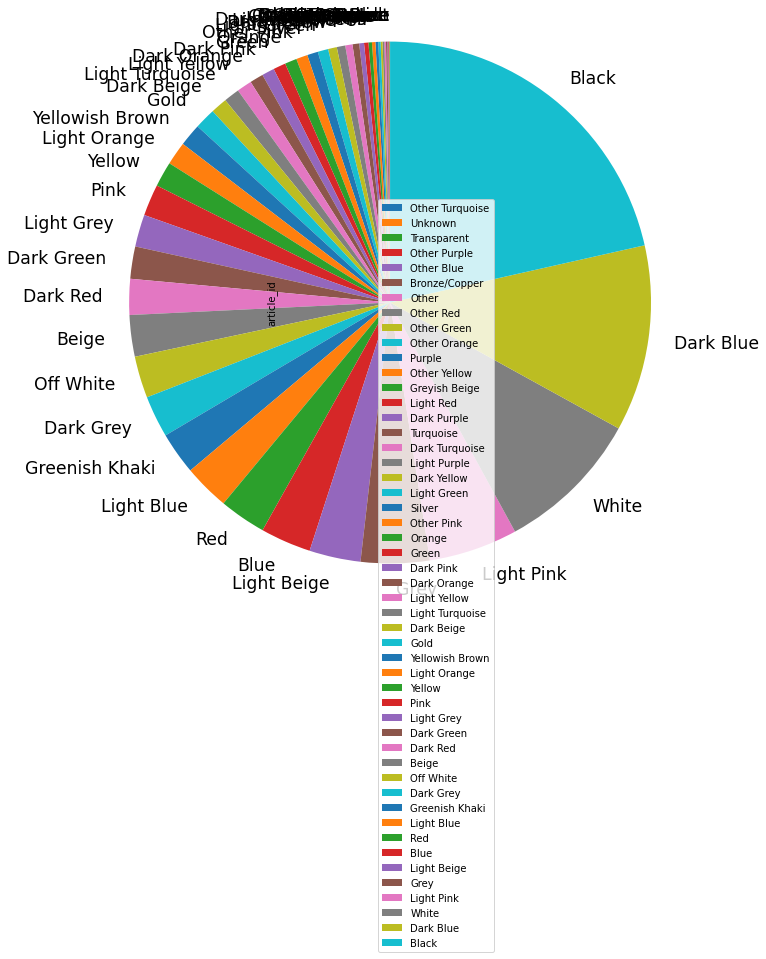

In [13]:
df_colour.sort_values('article_id').plot.pie(startangle=90, subplots=True, radius=3, fontsize='xx-large')

## Customers

| colmns                 | description                                                                                                                                               |
|------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| customer_id            | A unique identifier of every customer                                                                                                                     |
| FN                     | 1 or missed  <br>FN is if a customer get Fashion News newsletter  |
| Active                 | 1 or missed <br> Active is if the customer is active for communication                                                                                                                                               |
| club_member_status     | Status in club                                                                                                                                            |
| fashion_news_frequency | How often H&M may send news to customer                                                                                                                   |
| age                    | The current age                                                                                                                                           |
| postal_code            | Postal code of customer   

In [14]:
customers[['FN','Active']].isnull().sum()

FN        895050
Active    907576
dtype: int64

In [15]:
df_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
df_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


### FN，Activeの状況

- 積極的にコミュニケーションを行う顧客で，ファッションニュースを受け取っていない顧客はいない．
- ファッションニュースを受け取っている顧客は，必ずしも積極的にコミュニケーションを行うわけではない．
- 最も多い顧客は，コミュニケーションに消極的であり，ファッションニュースも受け取っていない．

In [16]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [17]:
customers[(customers['FN']!=1.0)&(customers['Active']==1.0)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code


In [18]:
customers[(customers['FN']==1.0)&(customers['Active']!=1.0)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
137,0005c68366e7955683b7cdc75535f400d76c2e713b6277...,1.0,NaN,ACTIVE,Regularly,43.0,52205389e515cded514c95fb56029ef05f29c189bc706a...
249,000b2018cebd824b6abdcbe9a9178067124ea4516a2d8c...,1.0,NaN,ACTIVE,Regularly,22.0,efe02004f43b4fbe5cc30862bc536832f8430bbfae1c8e...
335,00100a3fbf886724f574b726bdb47cf5b4fba1acbd2cc4...,1.0,NaN,ACTIVE,None,22.0,f187902768ee417d3a60f1bbf75ce8f1e7c3fee0faf76b...
438,0014a050e53bac4c5bd56296afbbea26d542fe4340a559...,1.0,NaN,ACTIVE,Regularly,56.0,331678faef3b54c05725daa112632274feb760552d84f8...
478,00163db01b48157e99b49618eee91ef265c193414cfb0a...,1.0,NaN,ACTIVE,Regularly,27.0,0416417bc05524c8407d92efa229f8c94ffb9abd45ffa8...
...,...,...,...,...,...,...,...
1371316,ffe044fa37ae4786bc6c8081c077daae5b203a9f8a2d8f...,1.0,NaN,ACTIVE,Regularly,19.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371409,ffe425daffac91b6bf77c8a4bb181c4866e3c4a08cbf79...,1.0,NaN,ACTIVE,Regularly,23.0,cc33da67515e2aacf19cfeb38afcc87db10f9fcefb4617...
1371457,ffe653a2cf91f6f353b6333b659c7d8d891a705913fa88...,1.0,NaN,ACTIVE,Regularly,23.0,fe59ceaf169875b877c6fef2e339156183f71d8fd3c404...
1371489,ffe7cc22f132fe52ff777967e5a8769ca13bd5715c3934...,1.0,NaN,ACTIVE,Regularly,55.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [19]:
customers[(customers['FN']==1.0)&(customers['Active']==1.0)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
13,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
15,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,1.0,1.0,ACTIVE,Regularly,54.0,ca8ca81e8b5794992144273b0eada83a7e09ec728c1093...
...,...,...,...,...,...,...,...
1371971,ffff7d65748db4d52e48b74c8f83ccb0029fc3bbafa511...,1.0,1.0,ACTIVE,Regularly,20.0,fffd995029b0b165c5627978bb20268fa4bb2257560931...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,e89f7536a3d1ff494b6324604db93646fca956d85f8e83...
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...


In [20]:
customers[(customers['FN']!=1.0)&(customers['Active']!=1.0)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,None,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
...,...,...,...,...,...,...,...
1371968,ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed...,NaN,NaN,ACTIVE,None,40.0,3b4a300713f8b142836a67caa5b6d5b3f10a7650c06820...
1371972,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,NaN,NaN,ACTIVE,None,52.0,0de9d1ec7dc785301ca5fbe8949cfc2cfbd77e7a807270...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,None,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,None,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...


### club member 状態別の顧客数

- 会員登録した顧客が最も多く，登録前の顧客がその次に多い．脱会した顧客が最も少ない．
- 会員登録した顧客の中でも，ファッションニュースを受け取っていない人が最も多く，常に受け取っている人がその次に多い．
- 会員登録した顧客が，最もコミュニケーションに積極的であり，ファッションニュースを受け取っている．

In [21]:
df_club = pd.DataFrame(customers.groupby(['club_member_status', 'fashion_news_frequency']).count()[['customer_id','FN', 'Active']])
df_club

customer_id      FN  Active
club_member_status fashion_news_frequency                             
ACTIVE             Monthly                         778     765     735
                   None                         800409     777     488
                   Regularly                    471304  469284  457229
LEFT CLUB          None                            459       0       0
                   Regularly                         8       8       3
PRE-CREATE         Monthly                          59      59      58
                   None                          87114       8       6
                   Regularly                      5787    5708    5567

<AxesSubplot:ylabel='club_member_status,fashion_news_frequency'>

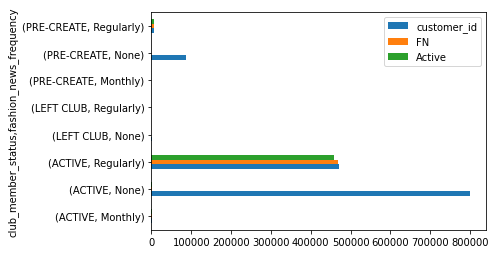

In [22]:
df_club.plot.barh()

### ファッションニュースの頻度

- NONEについて，表記揺れが存在する．(Noneになっているインデックスが2つある．)
- ファッションニュースを受け取っている頻度別で顧客の年齢を見た場合，特に違いはなかった．

In [23]:
df_freq = pd.DataFrame(customers.groupby(['fashion_news_frequency','club_member_status']).count()[['customer_id']])
df_freq

customer_id
fashion_news_frequency club_member_status             
Monthly                ACTIVE                      778
                       PRE-CREATE                   59
None                   ACTIVE                   800409
                       LEFT CLUB                   459
                       PRE-CREATE                87114
Regularly              ACTIVE                   471304
                       LEFT CLUB                     8
                       PRE-CREATE                 5787

array([<AxesSubplot:ylabel='customer_id'>], dtype=object)

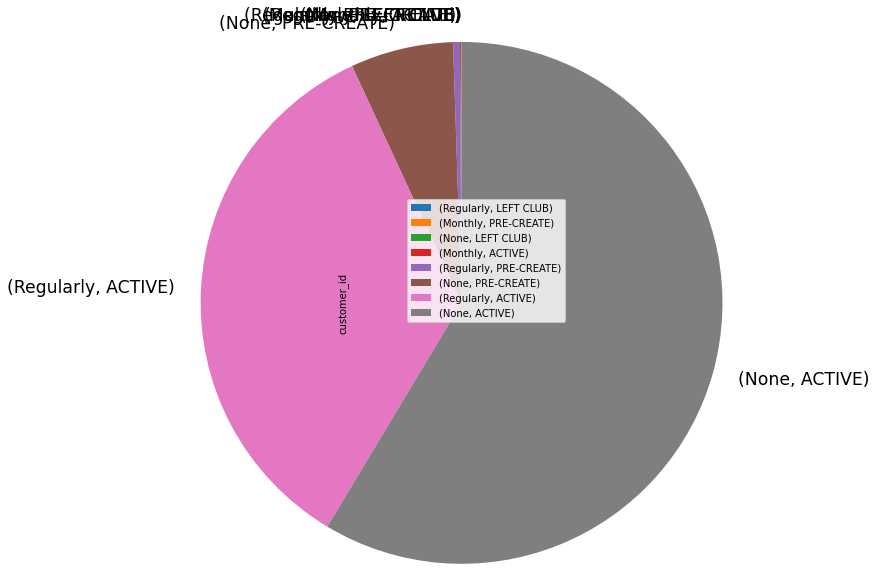

In [24]:
df_freq.sort_values('customer_id').plot.pie(startangle=90, subplots=True, radius=3, fontsize='xx-large')

In [27]:
import gc

del df_colour, df_postal

gc.collect()

31

## Transaction

| column           | description                                                |
|------------------|------------------------------------------------------------|
| t_dat            | A unique identifier of every customer                      |
| customer_id      | A unique identifier of every customer (in customers table) |
| article_id       | A unique identifier of every article (in articles table)   |
| price            | Price of purchase                                          |
| sales_channel_id | 1 or 2  <br>2 is online and 1 is store                         |

In [28]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


### 価格

In [26]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

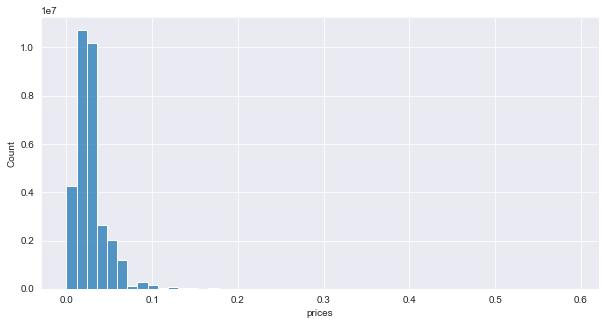

In [29]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=transactions.sort_values('price'), x='price', bins=50)
ax.set_xlabel('prices')
plt.show()

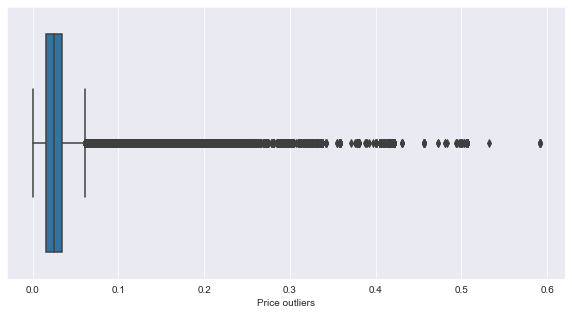

In [30]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price')
ax.set_xlabel('Price outliers')
plt.show()

### 顧客の1回の購入毎の合計価格

In [31]:
df_byid_sum = pd.DataFrame(transactions[['t_dat','customer_id','price']].groupby(['customer_id','t_dat']).sum())
df_byid_sum

price
customer_id                                        t_dat            
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... 2018-12-27 0.1101
                                                   2019-05-02 0.0102
                                                   2019-05-25 0.1017
                                                   2019-07-25 0.0339
                                                   2019-09-18 0.0441
...                                                              ...
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... 2020-04-05 0.0847
                                                   2020-04-09 0.0567
                                                   2020-04-25 0.0508
                                                   2020-06-22 0.0169
ffffd9ac14e89946416d80e791d064701994755c3ab686a... 2019-12-04 0.0847

[9080179 rows x 1 columns]

### 顧客毎の平均購入価格

In [32]:
df_byid_mean = pd.DataFrame(transactions[['customer_id','price']].groupby(['customer_id']).mean())
df_byid_mean

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.0309
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.0303
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0392
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.0305
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.0361
...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0.0253
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,0.0215
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,0.0175


In [33]:
df_byid = df_byid_sum.merge(
    df_byid_mean.rename({'price':'price_mean'},axis=1),
    on='customer_id',
    how='left')

df_byid.rename({'price':'price_sum'},axis=1, inplace=True)

            price_sum  price_mean
price_sum      1.0000      0.2346
price_mean     0.2346      1.0000


<AxesSubplot:>

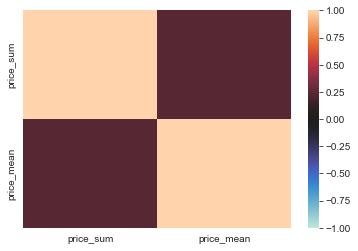

In [34]:
corr = df_byid.corr()
print(corr)
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

### 顧客毎のトランザクション数

In [35]:
df_trans_num = pd.DataFrame(transactions[['t_dat','customer_id']].groupby('customer_id').count())
df_trans_num

,t_dat
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13
...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,45


### 顧客毎の購入回数と購入毎の合計価格，顧客毎の平均購入価格

- 顧客の1回毎の購入価格と平均購入価格は弱い正の相関関係がある．
- 3変数間に相関関係は見られない．

In [36]:
price_trans_num = df_byid.merge(
    df_trans_num,
    on='customer_id',
    how='left')

price_trans_num.rename({'t_dat':'tran_num'},axis=1, inplace=True)

            price_sum  price_mean  tran_num
price_sum      1.0000      0.2346    0.2118
price_mean     0.2346      1.0000    0.0686
tran_num       0.2118      0.0686    1.0000


<AxesSubplot:>

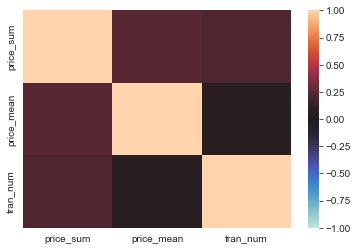

In [37]:
corr = price_trans_num.corr()
print(corr)
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

In [38]:
del df_byid_mean, df_byid_sum, df_trans_num

gc.collect()

5798

### 店舗購入数とオンライン購入数

- オンラインで購入する顧客が多い
- オンラインで購入する顧客の方が高い買い物をする

In [39]:
df_ch = pd.DataFrame(transactions[['sales_channel_id','customer_id']].groupby('sales_channel_id').count()['customer_id'])
df_ch.head()

,customer_id
sales_channel_id,
1,9408462
2,22379862


array([<AxesSubplot:ylabel='customer_id'>], dtype=object)

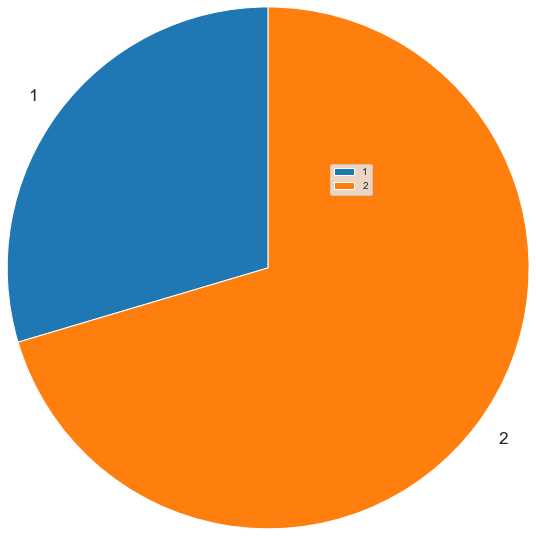

In [40]:
df_ch.plot.pie(startangle=90, subplots=True, radius=3, fontsize='xx-large')

<AxesSubplot:xlabel='sales_channel_id', ylabel='price'>

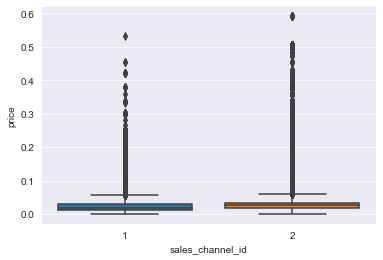

In [41]:
sns.boxplot(x='sales_channel_id', y='price', data=transactions)

In [42]:
transactions[['sales_channel_id','price']].groupby('sales_channel_id').mean()['price']

sales_channel_id
1   0.0229
2   0.0299
Name: price, dtype: float64

In [43]:
del df_ch, df_club, df_freq

gc.collect()

34

### 商品毎の売上

In [44]:
df_sales = pd.DataFrame(transactions[['article_id','price','customer_id']].groupby(['article_id']).sum())

In [45]:
article_id = list(df_sales['price'].index.get_level_values('article_id'))
sales = list(df_sales.price)

df_sales = pd.DataFrame(list(zip(article_id,sales)), columns = ['article_id','sales'])
df_sales.head()

,article_id,sales
0,108775015,88.2629
1,108775044,58.8262
2,108775051,1.0706
3,110065001,21.1087
4,110065002,9.8127


In [46]:
article_sales = articles.merge(
    df_sales,
    on='article_id',
    how='left'
    )

article_sales.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,sales
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,88.2629
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,58.8262
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1.0706
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",21.1087
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",9.8127


In [47]:
del df_sales

gc.collect()

7

### タイプ(紳士服・婦人服など)毎の売上

In [48]:
type_sales = pd.DataFrame(article_sales[['sales','index_group_name','index_name']].sort_values('index_group_name').groupby(['index_group_name', 'index_name']).sum())
type_sales.sort_values('sales', ascending=False)

sales
index_group_name index_name                                
Ladieswear       Ladieswear                     428503.8008
Divided          Divided                        189270.0430
Ladieswear       Lingeries/Tights               116117.7601
Menswear         Menswear                        48715.6368
Ladieswear       Ladies Accessories              42650.6123
Sport            Sport                           35865.5226
Baby/Children    Children Sizes 134-170          11013.1238
                 Children Sizes 92-140            6139.9530
                 Baby Sizes 50-98                 4450.4213
                 Children Accessories, Swimwear   1919.1003

<AxesSubplot:ylabel='index_group_name,index_name'>

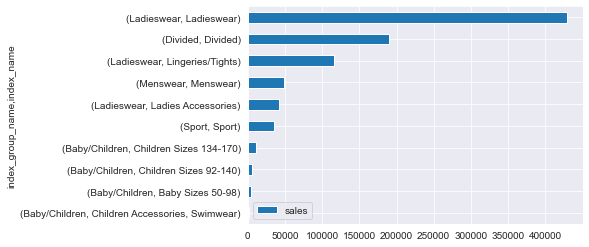

In [49]:
type_sales.sort_values('sales').plot.barh()

### グループ毎の売上

In [50]:
group_sales = pd.DataFrame(article_sales[['sales','product_group_name', 'product_type_name']].groupby(['product_group_name', 'product_type_name']).sum())
group_sales.sort_values('sales', ascending=False).head(15)

sales
product_group_name product_type_name            
Garment Lower body Trousers          150908.0462
Garment Full body  Dress             118185.7966
Garment Upper body Sweater            80732.9829
                   Blouse             42424.6305
                   Jacket             40422.7620
Garment Lower body Skirt              33230.4771
Garment Upper body Top                32120.5338
Underwear          Bra                31987.6368
Garment Upper body T-shirt            30274.8772
Garment Lower body Shorts             26973.2062
Swimwear           Bikini top         25902.8178
Garment Upper body Blazer             24189.5571
                   Vest top           22142.5493
                   Shirt              21222.8649
Garment Lower body Leggings/Tights    20184.8888

<AxesSubplot:ylabel='product_group_name,product_type_name'>

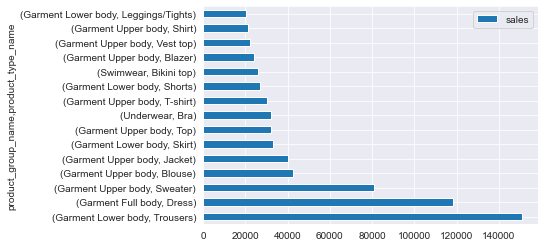

In [51]:
group_sales.sort_values('sales', ascending=False).head(15).plot.barh()

In [70]:
del group_sales, type_sales, corr

gc.collect()

312

### 再購入されている商品

In [73]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


In [5]:
df_reordered = transactions[['article_id','customer_id','t_dat']].groupby(['article_id','customer_id']).count().sort_values('t_dat',ascending=False)

In [11]:
df_reordered = df_reordered[df_reordered['t_dat']>4]['t_dat']

In [14]:
df_reordered = pd.DataFrame(df_reordered)

In [16]:
article_id = list(df_reordered['t_dat'].index.get_level_values('article_id'))
customer_id = list(df_reordered['t_dat'].index.get_level_values('customer_id'))
reordered = list(df_reordered.t_dat)

df_reordered = pd.DataFrame(list(zip(article_id,customer_id,reordered)), columns = ['article_id','customer_id','reordered'])
df_reordered.head()

,article_id,customer_id,reordered
0,678342001,d00063b94dcb1342869d4994844a2742b5d62927f36843...,570
1,629420001,94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d...,199
2,507909001,61da44a2758206d5701771f4315637b40c8321b5111916...,188
3,570002001,ef38ec0f0cb29ee8bbb87efc82fd16f4b99127e3eeefe6...,170
4,688558002,5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dc...,166


In [21]:
filter = (transactions['article_id'].isin(article_id) & transactions['customer_id'].isin(customer_id))

In [33]:
transaction_reordered = transactions.loc[filter]

In [30]:
t_dat_max = transaction_reordered.groupby('customer_id').t_dat.max().reset_index()
t_dat_max.columns = ['customer_id', 'max_dat']
t_dat_max.head()

,customer_id,max_dat
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,2020-09-14
1,00029b1b57c1aec110f48aac6639d71369387c5985cbd8...,2019-11-27
2,00067622de3151a7219b4ed9922def50b51601fbe41418...,2020-01-02
3,000af9152a52736ff524a502573a9b0862929b8911b7c4...,2018-10-25
4,000b6c6124d1c9fc9225e14b2e37461f15c9198a37ac94...,2019-08-20


In [34]:
transaction_reordered = transaction_reordered.merge(
    t_dat_max,
    on=['customer_id'],
    how='left'
)

transaction_reordered.head()

,t_dat,customer_id,article_id,price,sales_channel_id,max_dat
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415005,0.016932,2,2020-07-19
1,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,578374001,0.042356,2,2020-07-19
2,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2020-07-19
3,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415001,0.016932,2,2020-07-19
4,2018-09-20,00b5bd5358a05155631bf733a933ecff5eb872f5143af5...,624632002,0.015051,1,2020-09-09


In [38]:
transaction_reordered['t_dat'] = pd.to_datetime(transaction_reordered['t_dat'])
transaction_reordered['max_dat'] = pd.to_datetime(transaction_reordered['max_dat'])

In [39]:
transaction_reordered['diff_dat'] = (transaction_reordered.max_dat - transaction_reordered.t_dat)
transaction_reordered.head(15)

,t_dat,customer_id,article_id,price,sales_channel_id,max_dat,diff_dat
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415005,0.016932,2,2020-07-19,668 days
1,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,578374001,0.042356,2,2020-07-19,668 days
2,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2020-07-19,668 days
3,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415001,0.016932,2,2020-07-19,668 days
4,2018-09-20,00b5bd5358a05155631bf733a933ecff5eb872f5143af5...,624632002,0.015051,1,2020-09-09,720 days
5,2018-09-20,00be0a263381af38132d31225e8fb12fbc527c654b4464...,644522001,0.059305,2,2020-05-07,595 days
6,2018-09-20,0132d21d866697c428e4d6ffb02548fd71966aa88c8f5a...,580469005,0.080492,2,2020-07-31,680 days
7,2018-09-20,0132d21d866697c428e4d6ffb02548fd71966aa88c8f5a...,580469005,0.084729,2,2020-07-31,680 days
8,2018-09-20,0132d21d866697c428e4d6ffb02548fd71966aa88c8f5a...,553611001,0.033881,2,2020-07-31,680 days
9,2018-09-20,01e464bf74b13a55df22de1528eff2b33749c0cd92953b...,519583008,0.030492,2,2020-09-22,733 days


In [41]:
transaction_reordered[transaction_reordered['diff_dat']!='0 days']

,t_dat,customer_id,article_id,price,sales_channel_id,max_dat,diff_dat
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415005,0.016932,2,2020-07-19,668 days
1,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,578374001,0.042356,2,2020-07-19,668 days
2,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2020-07-19,668 days
3,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415001,0.016932,2,2020-07-19,668 days
4,2018-09-20,00b5bd5358a05155631bf733a933ecff5eb872f5143af5...,624632002,0.015051,1,2020-09-09,720 days
...,...,...,...,...,...,...,...
2793023,2020-09-21,f137c16fd175271922dad4006565503952f24750a57388...,893059005,0.042356,2,2020-09-22,1 days
2793069,2020-09-21,f939a529e5240d67edee69be9fec724d0091c839cb2545...,820572005,0.030492,2,2020-09-22,1 days
2793070,2020-09-21,f939a529e5240d67edee69be9fec724d0091c839cb2545...,736923009,0.016932,2,2020-09-22,1 days
2793071,2020-09-21,f939a529e5240d67edee69be9fec724d0091c839cb2545...,822344001,0.033881,2,2020-09-22,1 days


In [42]:
transaction_reordered.sort_values('diff_dat', ascending=False).head(15)

,t_dat,customer_id,article_id,price,sales_channel_id,max_dat,diff_dat
995,2018-09-20,4a8e7555d0832884045c0e3d917b9334d7d50238ca7652...,399223001,0.030492,2,2020-09-22,733 days
2027,2018-09-20,8a0ae4e0e9973682d96a9c41ba0427712165cea7941f1d...,539723003,0.033881,2,2020-09-22,733 days
624,2018-09-20,302a1b9e97d1ee2a69f1ec9d21621c7371be90fa961bc5...,468480031,0.010153,2,2020-09-22,733 days
2649,2018-09-20,bd720d8d726f4241dbe64f20eea49873d37e073cd93880...,399201005,0.059305,2,2020-09-22,733 days
2648,2018-09-20,bd720d8d726f4241dbe64f20eea49873d37e073cd93880...,589298001,0.084729,2,2020-09-22,733 days
962,2018-09-20,4714c372c7f7f5f1916cd981e0f70f876be49240444224...,678073002,0.025407,2,2020-09-22,733 days
2647,2018-09-20,bd720d8d726f4241dbe64f20eea49873d37e073cd93880...,589298001,0.084729,2,2020-09-22,733 days
1270,2018-09-20,58da40c2d2d450073b2c8fbe1abb7b324c8825f5a377a3...,683662006,0.011508,1,2020-09-22,733 days
718,2018-09-20,39027b5628211497a112392d645a8001409e3e2c87322e...,562245050,0.022017,2,2020-09-22,733 days
2026,2018-09-20,8a0ae4e0e9973682d96a9c41ba0427712165cea7941f1d...,621381011,0.033881,2,2020-09-22,733 days


In [47]:
list(transaction_reordered[transaction_reordered['diff_dat']=='1 days']['article_id'].drop_duplicates()[:20])

[548111002,
 501820043,
 656977001,
 623853004,
 651506001,
 623374007,
 587704003,
 693584002,
 600229001,
 568601006,
 575347003,
 660712003,
 568601020,
 562245001,
 708085001,
 452818001,
 484398001,
 687061002,
 609282001,
 638899001]